In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df = pd.read_csv('movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [64]:
df.shape

(10866, 21)

In [65]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [66]:
df.isnull().sum()

,0
id,0
imdb_id,10
popularity,0
budget,0
revenue,0
original_title,0
cast,76
homepage,7930
director,44
tagline,2824


In [67]:
df.drop(columns = ['id', 'imdb_id', 'homepage', 'cast', 'tagline', 'overview', 'budget_adj', 'budget_adj'], inplace = True)

In [68]:
df.head()

,popularity,budget,revenue,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.385749e+09


In [69]:
df.isnull().sum()

,0
popularity,0
budget,0
revenue,0
original_title,0
director,44
keywords,1493
runtime,0
genres,23
production_companies,1030
release_date,0


In [70]:
df.dropna(how = 'any', subset = ['genres', 'director'], inplace= True)

In [71]:
df['production_companies'] = df['production_companies'].fillna(0)
df['keywords'] = df['keywords'].fillna(0)

In [82]:
df['popularity'] = df['popularity'].round(2)
df['roi'] = df['roi'].round(2)

In [ ]:
df

In [73]:
df.insert(3, 'profit', df.revenue - df.budget)

In [74]:
df.insert(4, 'roi', df.profit / df.budget)

In [75]:
df

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,popularity,budget,revenue,profit,roi,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,revenue_adj
0,32.99,150000000,1513528810,1363528810,9.090192,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.392446e+09
1,28.42,150000000,378436354,228436354,1.522909,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,3.481613e+08
2,13.11,110000000,295238201,185238201,1.683984,Insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,2.716190e+08
3,11.17,200000000,2068178225,1868178225,9.340891,Star Wars: The Force Awakens,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.902723e+09
4,9.34,190000000,1506249360,1316249360,6.927628,Furious 7,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0.08,0,0,0,NaN,The Endless Summer,Bruce Brown,surfer|surfboard|surfing,95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00
10862,0.07,0,0,0,NaN,Grand Prix,John Frankenheimer,car race|racing|formula 1,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00
10863,0.07,0,0,0,NaN,Beregis Avtomobilya,Eldar Ryazanov,car|trolley|stealing car,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00
10864,0.06,0,0,0,NaN,"What's Up, Tiger Lily?",Woody Allen,spoof,80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00


In [76]:
df1 = [('popularity', 'budget', 'revenue', 'profit', 'roi', 'vote_count', 'vote_average', 'release_year')]

In [77]:
df.isnull().sum()

,0
popularity,0
budget,0
revenue,0
profit,0
roi,4641
original_title,0
director,0
keywords,0
runtime,0
genres,0


In [78]:
df.roi.value_counts()

,count
roi,
-1.000000,1311
inf,995
1.000000,5
0.000000,4
3.000000,4
...,...
-0.691508,1
-0.528361,1
-0.295646,1


In [79]:
non_finite_value =  ~np.isfinite(df['roi'])

In [80]:
non_finite_value.sum()

5636

In [81]:
df['roi' ] = df['roi'].replace([np.inf, -np.inf], np.nan)

In [83]:
#df1.hist(bins = 20, figsize = (14, 12))
plt.show()

AttributeError: 'list' object has no attribute 'hist'

In [84]:
df.popularity.value_counts()

,count
popularity,
0.14,193
0.28,190
0.21,186
0.25,182
0.20,179
...,...
5.81,1
5.08,1
3.83,1


<Axes: xlabel='release_year'>

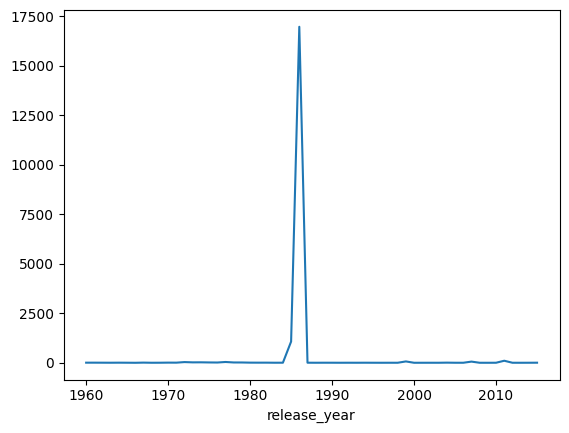

In [96]:
df2 = df.groupby('release_year')['roi'].mean()
df2.plot(kind = 'line')


In [99]:
df.head(2)

,popularity,budget,revenue,profit,roi,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,revenue_adj
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.392446e+09
1,28.42,150000000,378436354,228436354,1.52,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,3.481613e+08


Text(0, 0.5, 'Popularity')

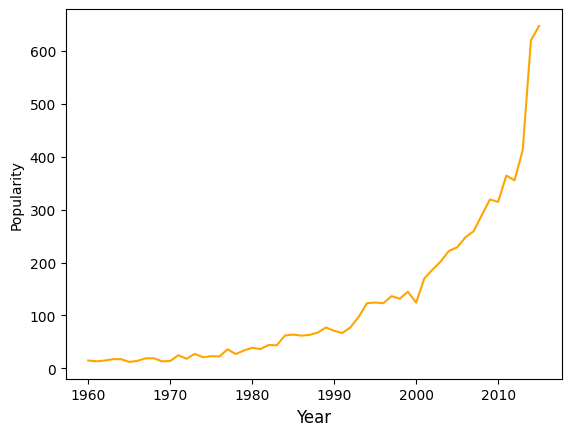

In [101]:
df3 = df.groupby('release_year')['popularity'].sum()
df3.plot(kind = 'line', color = 'orange')
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Popularity')


Text(0, 0.5, 'Rating')

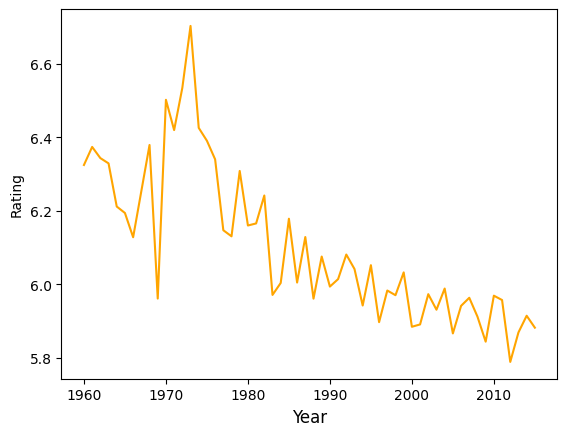

In [104]:
df4 = df.groupby('release_year')['vote_average'].mean()
df4.plot(kind = 'line', color = 'orange')
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Rating')

Text(0.5, 1.0, 'Popularity vs Vote Average')

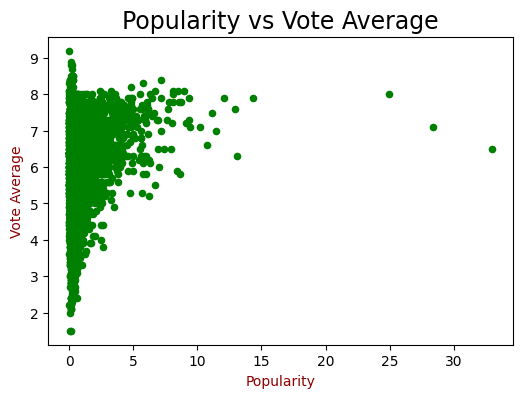

In [112]:
df5 = df.plot.scatter(x = 'popularity', y = 'vote_average', c = 'green', figsize = (6,4))
df5.set_xlabel('Popularity', color = 'DarkRed')
df5.set_ylabel('Vote Average', color = 'DarkRed')
df5.set_title('Popularity vs Vote Average', fontsize = 17)

In [113]:
df

,popularity,budget,revenue,profit,roi,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,revenue_adj
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.392446e+09
1,28.42,150000000,378436354,228436354,1.52,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,3.481613e+08
2,13.11,110000000,295238201,185238201,1.68,Insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,2.716190e+08
3,11.17,200000000,2068178225,1868178225,9.34,Star Wars: The Force Awakens,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.902723e+09
4,9.34,190000000,1506249360,1316249360,6.93,Furious 7,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0.08,0,0,0,NaN,The Endless Summer,Bruce Brown,surfer|surfboard|surfing,95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00
10862,0.07,0,0,0,NaN,Grand Prix,John Frankenheimer,car race|racing|formula 1,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00
10863,0.07,0,0,0,NaN,Beregis Avtomobilya,Eldar Ryazanov,car|trolley|stealing car,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00
10864,0.06,0,0,0,NaN,"What's Up, Tiger Lily?",Woody Allen,spoof,80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00


In [114]:
df.genres.value_counts()

,count
genres,
Drama,711
Comedy,707
Documentary,306
Drama|Romance,289
Comedy|Drama,280
...,...
Science Fiction|Horror|Action|Thriller,1
Action|Thriller|Science Fiction|Mystery,1
Comedy|Music|Romance|Foreign,1


In [117]:
split = ['genres']
for i in split:
    df[i] = df[i].apply(lambda x: x.split('|'))
df.head(3)

,popularity,budget,revenue,profit,roi,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,revenue_adj
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.392446e+09
1,28.42,150000000,378436354,228436354,1.52,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,"[Action, Adventure, Science Fiction, Thriller]",Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,3.481613e+08
2,13.11,110000000,295238201,185238201,1.68,Insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,"[Adventure, Science Fiction, Thriller]",Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,2.716190e+08


In [118]:
df = df.explode('genres')
df

,popularity,budget,revenue,profit,roi,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,revenue_adj
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.392446e+09
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.392446e+09
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.392446e+09
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.392446e+09
1,28.42,150000000,378436354,228436354,1.52,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,3.481613e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10863,0.07,0,0,0,NaN,Beregis Avtomobilya,Eldar Ryazanov,car|trolley|stealing car,94,Mystery,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00
10863,0.07,0,0,0,NaN,Beregis Avtomobilya,Eldar Ryazanov,car|trolley|stealing car,94,Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00
10864,0.06,0,0,0,NaN,"What's Up, Tiger Lily?",Woody Allen,spoof,80,Action,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00
10864,0.06,0,0,0,NaN,"What's Up, Tiger Lily?",Woody Allen,spoof,80,Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00


In [119]:
df7 = df.groupby('genres')['popularity'].sum().sort_values(ascending = False)
df7


,popularity
genres,
Drama,2815.43
Comedy,2246.25
Action,2208.08
Thriller,2155.90
Adventure,1697.11
Science Fiction,1230.41
Romance,1013.21
Crime,1009.07
Family,967.06


<Axes: ylabel='genres'>

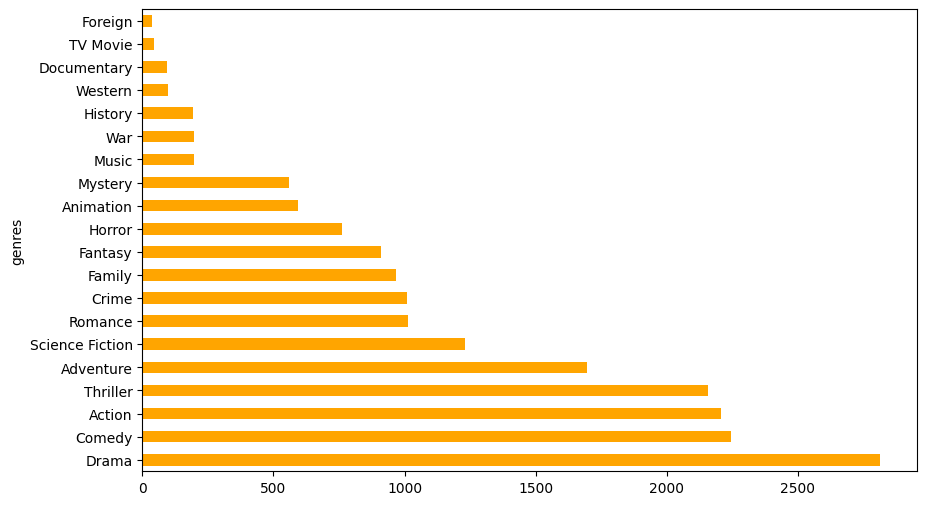

In [121]:
df7.plot.barh(x = 'genres', y = 'popularity', color = 'orange', figsize = (10, 6))

In [122]:
df.head(1)

,popularity,budget,revenue,profit,roi,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,revenue_adj
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.392446e+09


In [123]:
df.dtypes

,0
popularity,float64
budget,int64
revenue,int64
profit,int64
roi,float64
original_title,object
director,object
keywords,object
runtime,int64
genres,object


In [125]:
df['release_date'] = pd.to_datetime(df['release_date'])

<ipython-input-125-bd17abdb2e31>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['release_date'] = pd.to_datetime(df['release_date'])


In [126]:
df.head(5)

,popularity,budget,revenue,profit,roi,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,revenue_adj
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.392446e+09
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.392446e+09
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.392446e+09
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.392446e+09
1,28.42,150000000,378436354,228436354,1.52,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,3.481613e+08


In [127]:
df['extracted_month'] = df['release_date'].dt.month


In [129]:
df.head()

,popularity,budget,revenue,profit,roi,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,revenue_adj,extracted_month
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.392446e+09,6
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.392446e+09,6
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.392446e+09,6
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.392446e+09,6
1,28.42,150000000,378436354,228436354,1.52,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,3.481613e+08,5


In [130]:
df8 = df.groupby('extracted_month')['popularity'].sum()

In [133]:
df8

,popularity
extracted_month,
1,1131.78
2,1092.93
3,1458.32
4,1191.81
5,1687.53
6,1936.84
7,1694.03
8,1432.59
9,1872.28


In [134]:
df8.values

array([1131.78, 1092.93, 1458.32, 1191.81, 1687.53, 1936.84, 1694.03,
       1432.59, 1872.28, 1811.91, 1710.35, 2002.22])

In [136]:
data = {
    'extracted_month': df8.index,
    'popularity': df8.values
}
df8 = pd.DataFrame(data)

In [137]:
df8

,extracted_month,popularity
0,1,1131.78
1,2,1092.93
2,3,1458.32
3,4,1191.81
4,5,1687.53
5,6,1936.84
6,7,1694.03
7,8,1432.59
8,9,1872.28
9,10,1811.91


In [138]:
index_to_month = {
    1: 'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'
}

In [139]:
df8.extracted_month = df8.extracted_month.map(index_to_month)

In [140]:
df8

,extracted_month,popularity
0,January,1131.78
1,February,1092.93
2,March,1458.32
3,April,1191.81
4,May,1687.53
5,June,1936.84
6,July,1694.03
7,August,1432.59
8,September,1872.28
9,October,1811.91


<Axes: xlabel='extracted_month'>

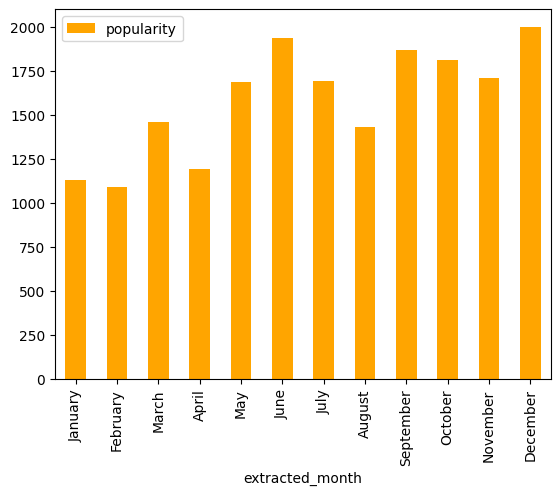

In [145]:
df8.plot(kind = 'bar', x = 'extracted_month', y = 'popularity', color = 'orange')

In [146]:
df9 = df.groupby('extracted_month')['revenue'].sum()
df9

,revenue
extracted_month,
1,35873456579
2,54352852344
3,93669046441
4,77813179749
5,151475532493
6,193681776686
7,141947570995
8,71642408883
9,70379641581


In [147]:
data = {
    'extracted_month': df8.index,
    'revenue': df9.values
}
df9 = pd.DataFrame(data)

In [148]:
index_to_month = {
    1: 'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'
}

In [149]:
df9.extracted_month = df9.extracted_month.map(index_to_month)

In [150]:
df9

,extracted_month,revenue
0,NaN,35873456579
1,January,54352852344
2,February,93669046441
3,March,77813179749
4,April,151475532493
5,May,193681776686
6,June,141947570995
7,July,71642408883
8,August,70379641581
9,September,84054172048


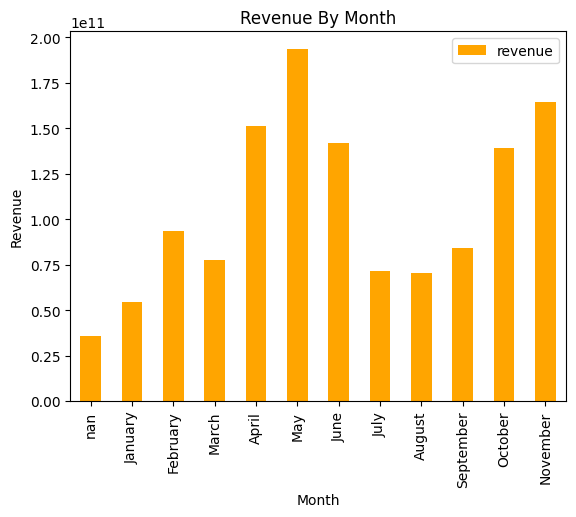

In [151]:
df9.plot(kind = 'bar', x = 'extracted_month', y = 'revenue', color = 'orange')
plt.title('Revenue By Month')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

In [152]:
df.head()

,popularity,budget,revenue,profit,roi,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,revenue_adj,extracted_month
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.392446e+09,6
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.392446e+09,6
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.392446e+09,6
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.392446e+09,6
1,28.42,150000000,378436354,228436354,1.52,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,3.481613e+08,5


In [158]:
df10 = df.groupby('original_title')['profit'].sum().sort_values(ascending = False).head(5)
df10

,profit
original_title,
Avatar,10178023388
Star Wars: The Force Awakens,7472712900
Jurassic World,5454115240
The Net,5421398290
Titanic,4896102564


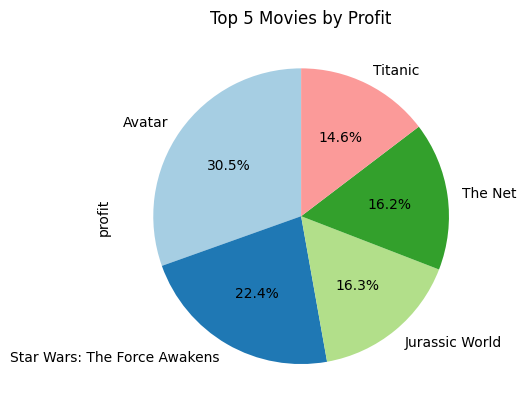

In [161]:
df10.plot(kind = 'pie', autopct = '%1.1f%%', startangle = 90, colors =plt.cm.Paired.colors )
plt.title('Top 5 Movies by Profit')
plt.show()

In [162]:
df.head()

,popularity,budget,revenue,profit,roi,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,revenue_adj,extracted_month
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.392446e+09,6
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.392446e+09,6
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.392446e+09,6
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.392446e+09,6
1,28.42,150000000,378436354,228436354,1.52,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,3.481613e+08,5


In [168]:
df['production_companies'] = df['production_companies'].str.strip() #i use this because the first column is name 0
df11 = df['production_companies'].value_counts().head(5)
df11

,count
production_companies,
Paramount Pictures,404
Universal Pictures,352
Walt Disney Pictures,236
Warner Bros.,225
Columbia Pictures,207


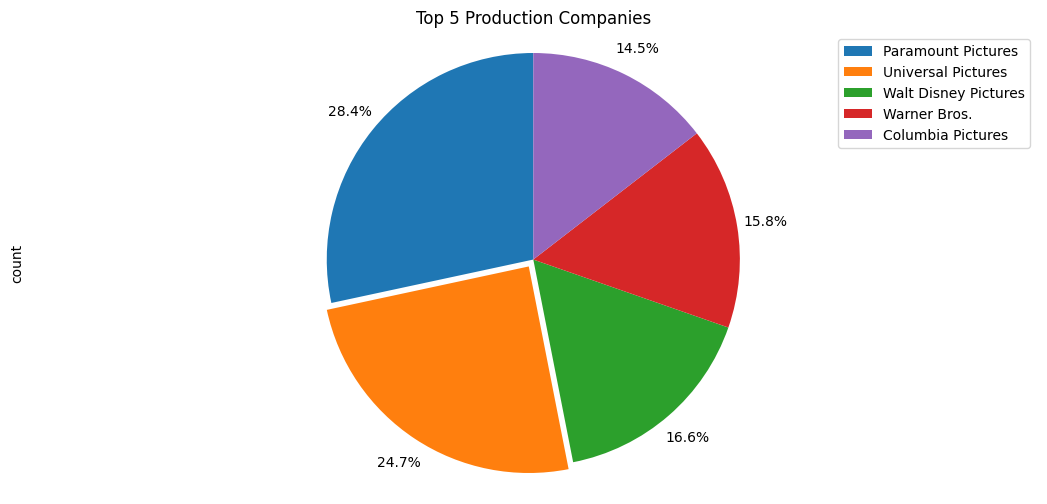

In [175]:
explode_list = [0,0.04,0,0,0]
df11.plot(kind = 'pie', figsize= (13,6), autopct = '%1.1f%%', startangle = 90, labels = None , pctdistance = 1.14,
          explode = explode_list )
plt.legend(labels = df11.index, loc = 'upper right')
plt.title('Top 5 Production Companies')
plt.axis('equal')
plt.show()


In [176]:
df.head()

,popularity,budget,revenue,profit,roi,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,revenue_adj,extracted_month
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.392446e+09,6
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.392446e+09,6
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.392446e+09,6
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.392446e+09,6
1,28.42,150000000,378436354,228436354,1.52,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,3.481613e+08,5


In [182]:
df['keywords'] = df['keywords'].str.strip()#i use this because the first column is name 0
df12 = df.keywords.value_counts().head(15)
df12


,count
keywords,
woman director,238
independent film,177
suspense,68
musical,57
sport,50
duringcreditsstinger,49
holiday,38
dystopia,26
biography,26


In [184]:
data = {
    'keyword': df12.index,
    'value': df12.values
}
df12 = pd.DataFrame(data)

In [185]:
df12

,keyword,value
0,woman director,238
1,independent film,177
2,suspense,68
3,musical,57
4,sport,50
5,duringcreditsstinger,49
6,holiday,38
7,dystopia,26
8,biography,26
9,holiday|christmas,23


In [187]:
import plotly.express as px
fig = px.treemap(df12, path = ['keyword'], values = 'value')
fig.show()